In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data_csv/updated_city_region.csv', index_col=0)

In [3]:
df.head()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,city,date,month,month_num,region
0,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,4,January,1,Northeastern
1,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,4,January,1,Northeastern
2,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,4,January,1,Southeastern
3,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,4,January,1,Southeastern
4,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,4,January,1,Northeastern


### ** cek apakah kolom total_bags merupakan jumlah dari data di masing-masing kolom small_bags, large_bags, xlarge_bags **

In [5]:
bags = df[['total_bags', 'small_bags', 'large_bags', 'xlarge_bags']]

In [6]:
bags

,total_bags,small_bags,large_bags,xlarge_bags
0,9716.46,9186.93,529.53,0.00
1,1162.65,1162.65,0.00,0.00
2,46815.79,16707.15,30108.64,0.00
3,1408.19,1071.35,336.84,0.00
4,141136.68,137146.07,3990.61,0.00
...,...,...,...,...
30012,1407.00,1111.00,295.00,0.00
30013,336846.03,276681.61,60134.42,30.00
30014,13933.00,13933.00,0.00,0.00
30019,662904.25,395909.35,265177.09,1817.81


In [7]:
bags['total'] = bags['small_bags'] + bags['large_bags'] + bags['xlarge_bags']

In [8]:
bags.head()

,total_bags,small_bags,large_bags,xlarge_bags,total
0,9716.46,9186.93,529.53,0.0,9716.46
1,1162.65,1162.65,0.00,0.0,1162.65
2,46815.79,16707.15,30108.64,0.0,46815.79
3,1408.19,1071.35,336.84,0.0,1408.19
4,141136.68,137146.07,3990.61,0.0,141136.68


==> total_bags = small_bags + large_bags + xlarge_bags

In [9]:
df.shape

(26685, 16)

In [10]:
## statistik data numerik

df.describe().T

,count,mean,std,min,25%,50%,75%,max
average_price,26685.0,1.397016,0.386725,0.44,1.11,1.36,1.64,3.25
total_volume,26685.0,385472.447839,853862.747327,84.56,12170.00,91687.96,391257.01,11324682.73
4046,26685.0,116384.284347,305483.346396,0.00,557.28,6697.00,90627.94,4794142.14
4225,26685.0,121486.007693,289094.164096,0.00,2257.51,18254.90,98672.41,4097591.67
4770,26685.0,11300.570358,42484.559757,0.00,0.00,107.12,3589.81,794742.87
total_bags,26685.0,136245.544187,320799.756995,0.00,7042.91,37910.90,121026.49,6301211.12
small_bags,26685.0,98877.112040,246118.287301,0.00,4530.25,25005.52,87952.58,4017034.51
large_bags,26685.0,34046.256893,93598.951301,0.00,191.94,3463.02,24983.00,2389749.50
xlarge_bags,26685.0,3322.174766,19256.659100,0.00,0.00,0.00,355.98,561613.84
year,26685.0,2017.205134,1.570140,2015.00,2016.00,2017.00,2019.00,2020.00


In [17]:
## statistik data non-numerik

df.describe(include='O').T

,count,unique,top,freq
type,26685,2,conventional,13344
city,26685,48,Columbus,556
month,26685,12,March,2592
region,26685,5,Southeastern,7228


In [5]:
desc = []

for i in df.columns:
    desc.append([
        i,
        df[i].dtypes,
        df[i].isnull().sum(),
        round((((df[i].isnull().sum())/(len(df)))*100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [6]:
dfDesc = pd.DataFrame(desc, columns=['dataFeatures', 'dataType', 'null', 'nullPercentage', 'unique', 'uniqueSample'])

In [7]:
dfDesc

,dataFeatures,dataType,null,nullPercentage,unique,uniqueSample
0,average_price,float64,0,0.0,260,"[2.75, 1.32]"
1,total_volume,float64,0,0.0,26561,"[291330.71, 13050.15]"
2,4046,float64,0,0.0,25469,"[5709.17, 571.77]"
3,4225,float64,0,0.0,26093,"[3572.69, 7286.63]"
4,4770,float64,0,0.0,16041,"[1193.83, 401.45]"
5,total_bags,float64,0,0.0,26412,"[2518.29, 191656.9]"
6,small_bags,float64,0,0.0,25610,"[1590110.0, 35552.88]"
7,large_bags,float64,0,0.0,22224,"[37852.42, 412.1]"
8,xlarge_bags,float64,0,0.0,8644,"[410.0, 9790.0]"
9,type,object,0,0.0,2,"[conventional, organic]"


In [9]:
df.drop(columns=['month_num'], inplace=True)

### kolom target: average_price dan city

==> cek distribusi kolom average_price: handling outliers, dan distribusi kolom city: handling imbalanced data

### ** pairplot **

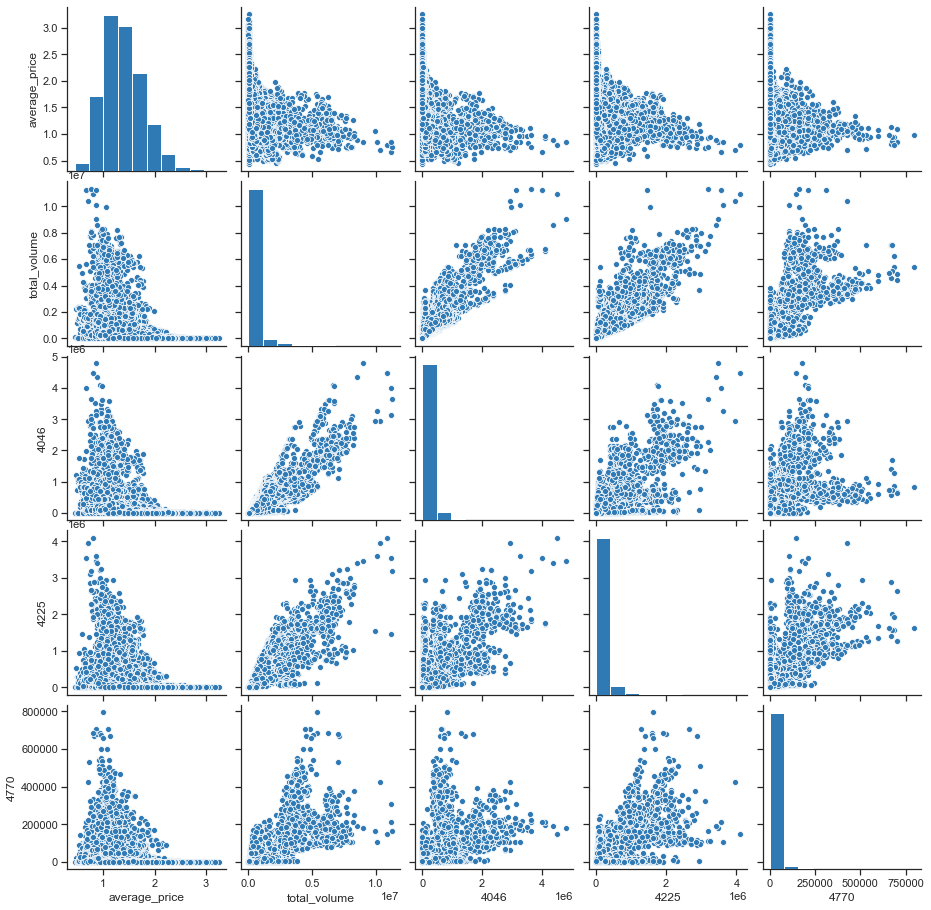

In [11]:
sns.set(style='ticks', palette='RdBu_r')
sns.pairplot(df, vars=['average_price', 'total_volume', '4046', '4225', '4770'])

plt.show()

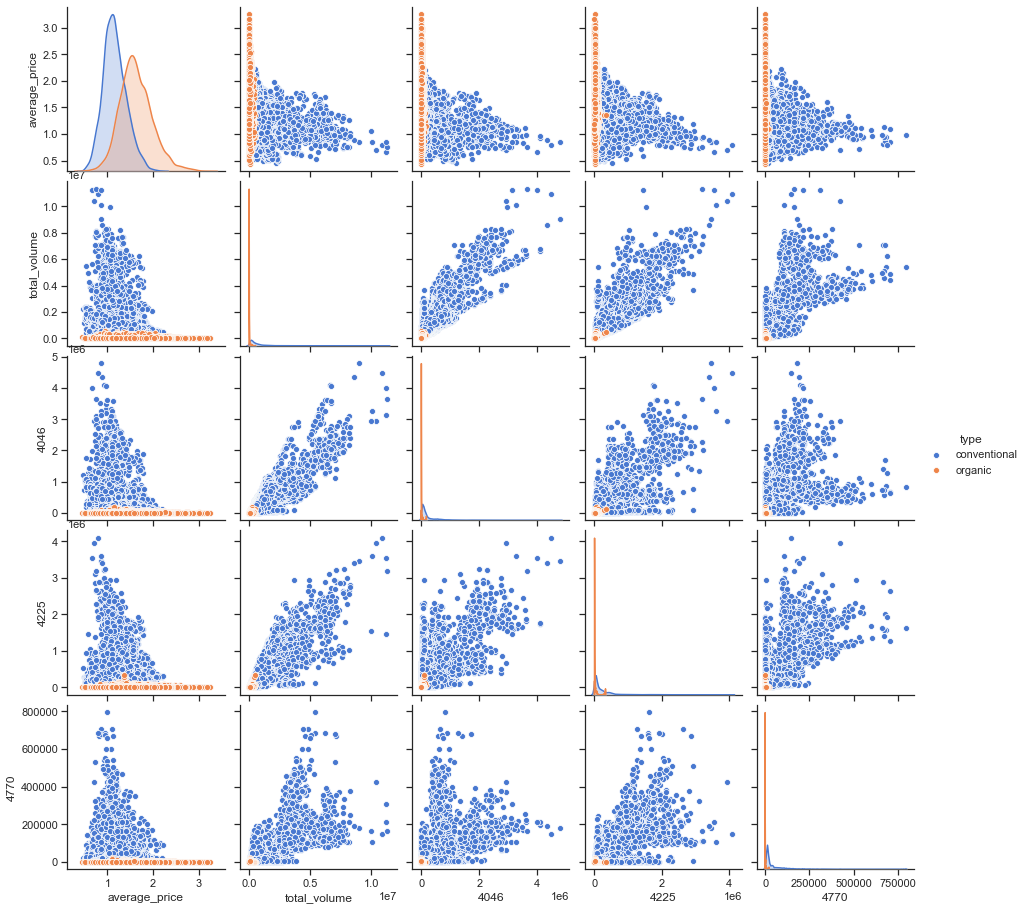

In [10]:
sns.set(style='ticks', palette='muted')
sns.pairplot(df, vars=['average_price', 'total_volume', '4046', '4225', '4770'], hue='type')
# sns.legend()
plt.show()

### Insight

- Scatter plot antara fitur total_volume, 4046, 4225, dan 4770 menunjukkan korelasi positif, dimana kenaikan volume avocado masing-masing PLU 4046, 4225, dan 4770 juga disertai dengan kenaikan total_volume. 
- Avocado tipe conventional memiliki variasi data yang lebih besar daripada avocado tipe organik
- Dibandingkan distribusi data masing-masing jenis avocado, avocado tipe organic memiliki range harga lebih tinggi daripada avocado conventional

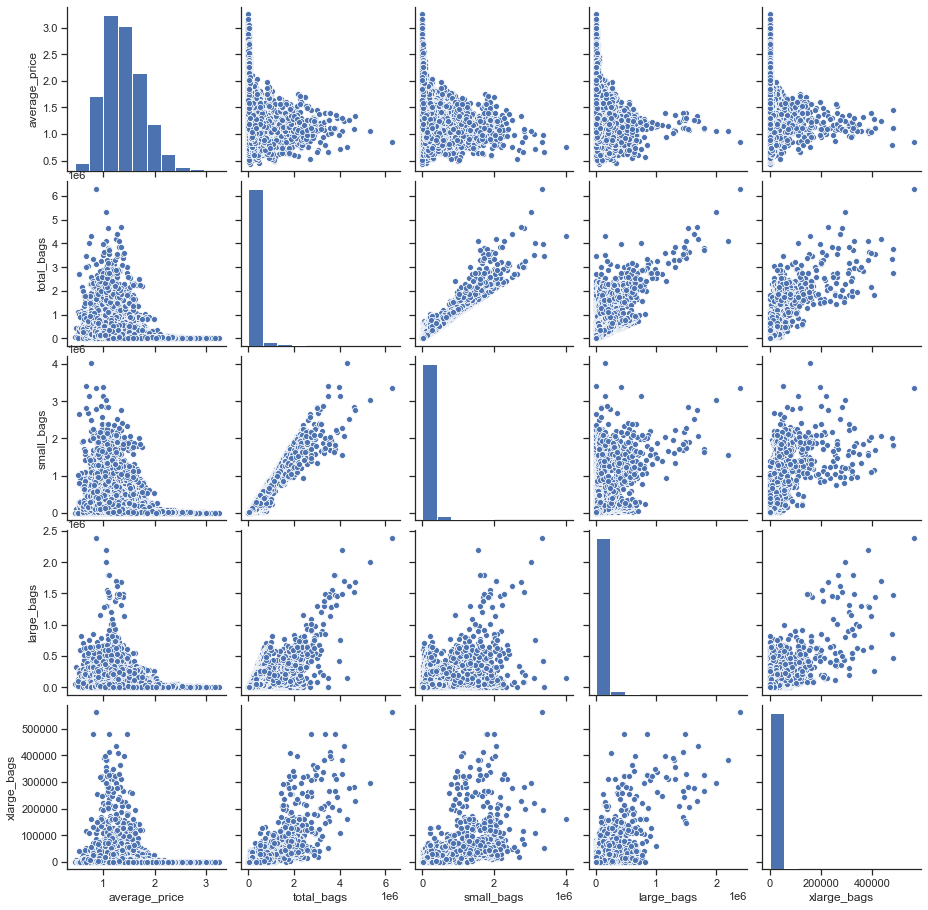

In [11]:
sns.set(style='ticks')
sns.pairplot(df, vars=['average_price', 'total_bags', 'small_bags', 'large_bags', 'xlarge_bags'])

plt.show()

C:\Users\Andita\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


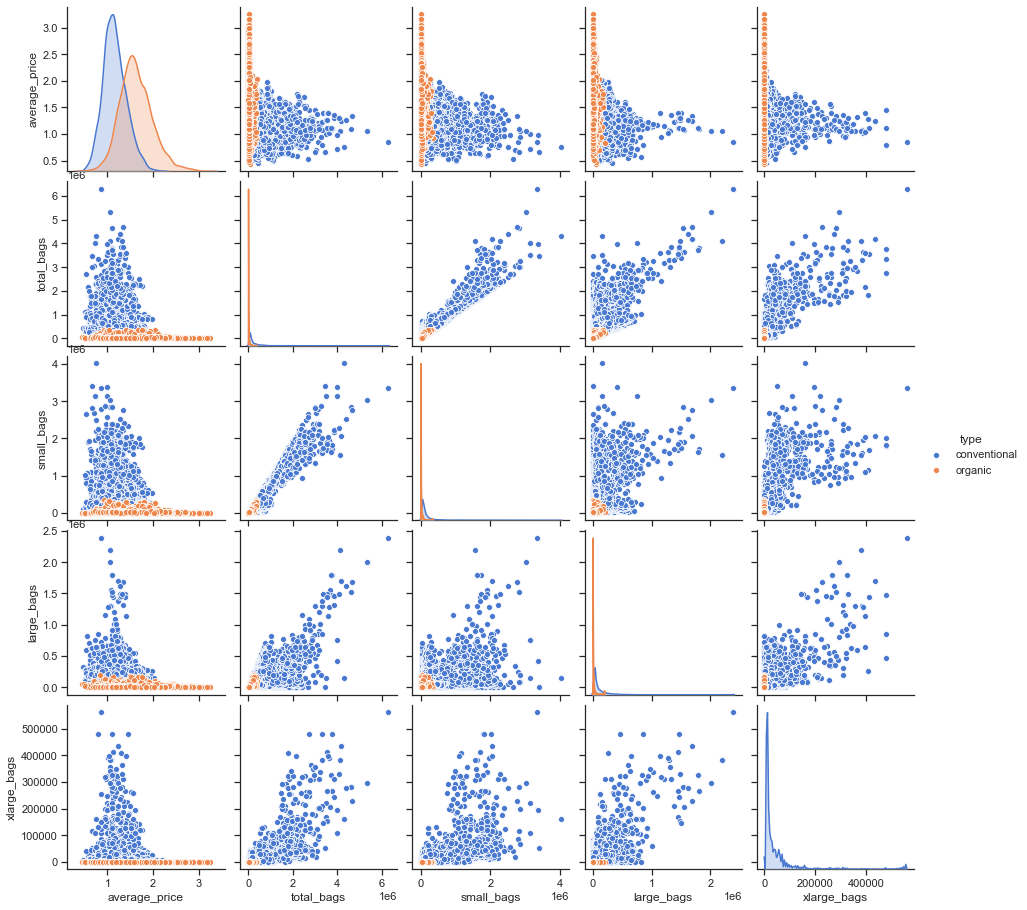

In [12]:
sns.set(style='ticks', palette='muted')
sns.pairplot(df, vars=['average_price', 'total_bags', 'small_bags', 'large_bags', 'xlarge_bags'], hue='type')

plt.show()

### Insight

- Scatter plot antara fitur total_bags, small_bags, large_bags, dan xlarge_bags menunjukkan korelasi positif, hal ini karena fitur total_bags merupakan penjumlahan dari fitur small_bags, large_bags, dan xlarge_bags

### ** kolom average_price **

In [15]:
df[df['type'] == 'organic']['average_price']

1        1.79
3        1.76
5        1.29
7        1.64
9        1.83
         ... 
30008    1.85
30010    2.02
30012    1.63
30014    1.19
30020    1.58
Name: average_price, Length: 13341, dtype: float64

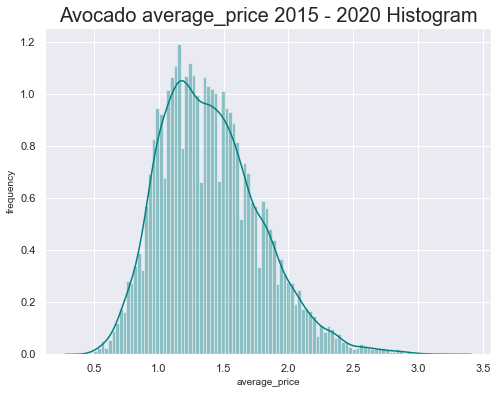

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize=(8, 6))
sns.set(style='darkgrid')
sns.distplot(df['average_price'], bins=100, color='teal')
plt.title('Avocado average_price 2015 - 2020 Histogram', fontsize=20)
plt.xlabel('average_price', fontsize=10)
plt.ylabel('frequency', fontsize=10)
plt.show()
plt.savefig('./plot/hist_price.png')

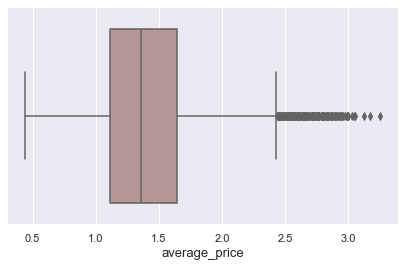

In [24]:
plt.figure(figsize=(7, 4))

sns.boxplot(df['average_price'], color='rosybrown')
plt.xlabel('average_price', fontsize=13)
plt.show()

C:\Users\Andita\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


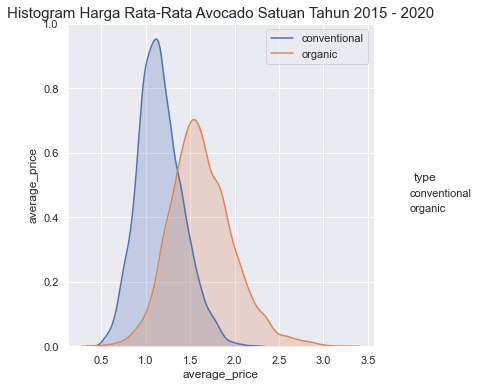

In [20]:
sns.pairplot(df, vars=['average_price'], hue='type', size=5)
plt.legend()
plt.title('Histogram Harga Rata-Rata Avocado Satuan Tahun 2015 - 2020', size=15)
plt.show()

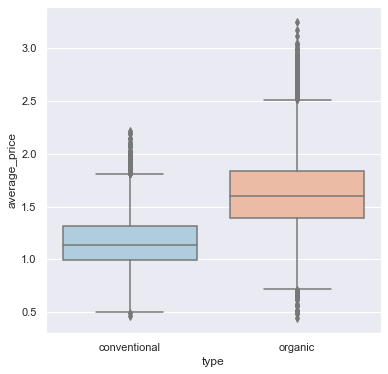

In [21]:
plt.figure(figsize=(6, 6))

sns.boxplot(x="type", y="average_price", data=df, palette='RdBu_r')
plt.show()

## ** average price thd total_volume **

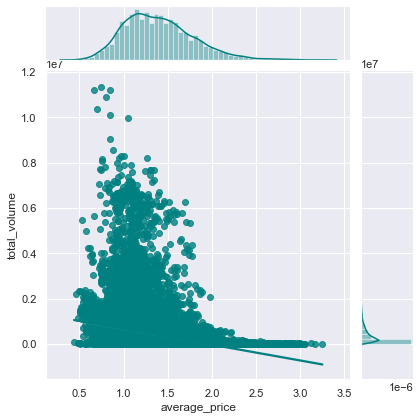

In [22]:
sns.set_style('darkgrid')

g = sns.jointplot('average_price', 'total_volume', data=df,
                 kind='reg', color='teal')

plt.show()

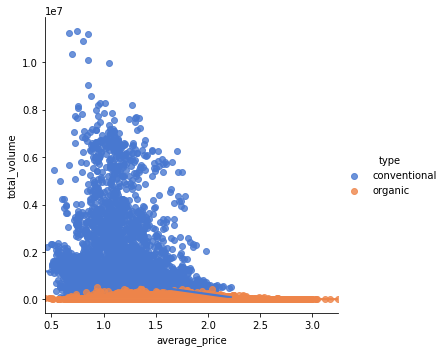

In [4]:
sns.lmplot('average_price', 'total_volume', data=df, hue='type',palette='muted')
plt.show()

## ** Average price thd total_bags **

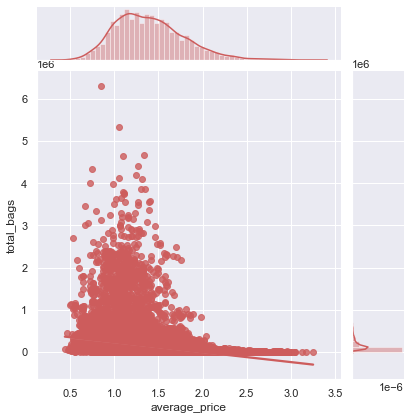

In [24]:
sns.set_style('darkgrid')

g = sns.jointplot('average_price', 'total_bags', data=df,
                 kind='reg', color='indianred')

plt.show()

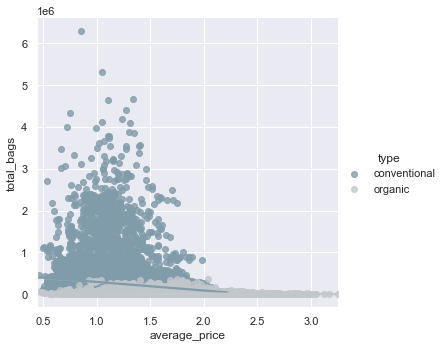

In [25]:
sns.lmplot('average_price', 'total_bags', data=df, hue='type',palette='RdBu_d')
plt.show()

### ** Average Price thd City **

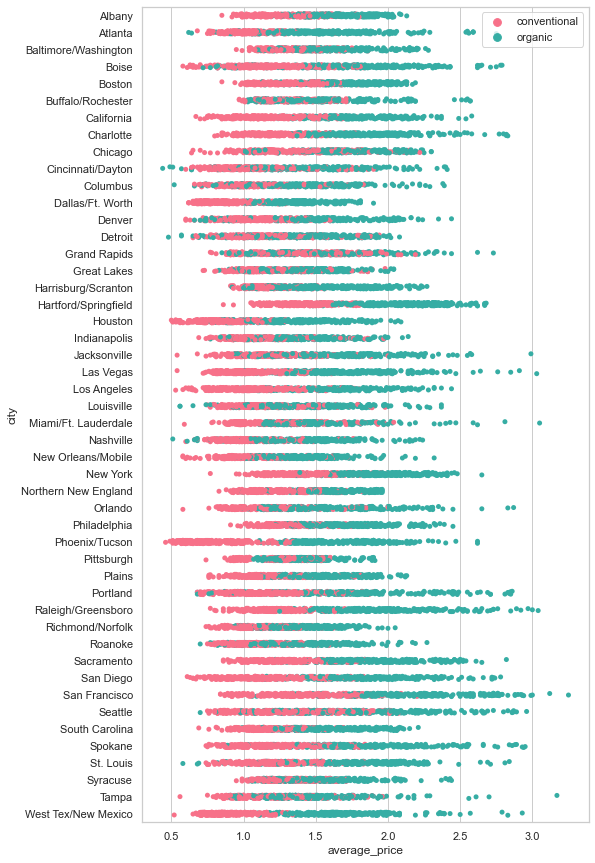

In [101]:
plt.figure(figsize=(8, 15))

sns.stripplot(x='average_price', y='city', data=df, hue='type', palette='husl')
plt.legend()
plt.show()

In [11]:
df.groupby(['region', 'city'])['average_price', 'total_volume'].aggregate(['mean', 'min', 'max', 'std'])

average_price                        \
                                           mean   min   max       std   
region       city                                                       
Midwestern   Chicago                   1.535989  0.64  2.30  0.328163   
             Cincinnati/Dayton         1.239191  0.44  2.41  0.362413   
             Columbus                  1.230450  0.52  2.39  0.320988   
             Detroit                   1.262518  0.48  2.08  0.303715   
             Grand Rapids              1.456403  0.77  2.73  0.324284   
             Great Lakes               1.318471  0.72  2.04  0.256320   
             Indianapolis              1.272320  0.69  2.14  0.282196   
             St. Louis                 1.460647  0.58  2.84  0.404819   
Northeastern Albany                    1.506187  0.85  2.13  0.279959   
             Baltimore/Washington      1.481996  0.95  2.28  0.259916   
             Boston                    1.529694  0.85  2.19  0.289988   
             Buffalo/Rochester         1.410576  0.97  2.57  0.273123   
             Harrisburg/Scranton       1.400629  0.91  2.27  0.305817   
             Hartford/Springfield      1.770953  0.86  2.68  0.428806   
             New York                  1.678309  0.77  2.65  0.360055   
             Northern New England      1.454964  0.83  1.96  0.281020   
             Philadelphia              1.543669  0.91  2.45  0.304937   
             Pittsburgh                1.335054  0.74  1.91  0.196180   
             Syracuse                  1.430737  0.95  2.44  0.251973   
Southeastern Atlanta                   1.312842  0.62  2.75  0.368720   
             Charlotte                 1.570450  0.80  2.83  0.400825   
             Jacksonville              1.416906  0.54  2.99  0.380728   
             Louisville                1.282068  0.56  2.37  0.318346   
             Miami/Ft. Lauderdale      1.355306  0.59  3.05  0.304116   
             Nashville                 1.226025  0.51  2.24  0.327312   
             New Orleans/Mobile        1.247140  0.58  2.32  0.282663   
             Orlando                   1.389424  0.58  2.87  0.360223   
             Raleigh/Greensboro        1.573759  0.77  3.04  0.459718   
             Richmond/Norfolk          1.258345  0.74  2.05  0.241733   
             Roanoke                   1.243813  0.70  2.27  0.282590   
             South Carolina            1.379748  0.69  2.21  0.317680   
             Tampa                     1.321906  0.56  3.17  0.310730   
Southwestern Dallas/Ft. Worth          1.088201  0.62  1.90  0.294937   
             Houston                   1.081817  0.50  2.09  0.344608   
             Phoenix/Tucson            1.224209  0.46  2.62  0.505303   
             West Tex/New Mexico       1.266275  0.52  2.93  0.453546   
Western      Boise                     1.440072  0.58  2.79  0.443724   
             California                1.444784  0.67  2.58  0.382891   
             Denver                    1.276403  0.60  2.44  0.327704   
             Las Vegas                 1.377788  0.54  3.03  0.428066   
             Los Angeles               1.304353  0.53  2.44  0.387646   
             Plains                    1.373633  0.76  2.13  0.300163   
             Portland                  1.414730  0.68  2.86  0.465099   
             Sacramento                1.596583  0.86  2.82  0.393308   
             San Diego                 1.455594  0.61  2.78  0.454107   
             San Francisco             1.771871  0.84  3.25  0.506822   
             Seattle                   1.535683  0.70  2.96  0.449124   
             Spokane                   1.507590  0.74  2.95  0.452240   

                                   total_volume                         \
                                           mean       min          max   
region       city                                                        
Midwestern   Chicago               4.063371e+05   9910.84   2025925.36   
             C

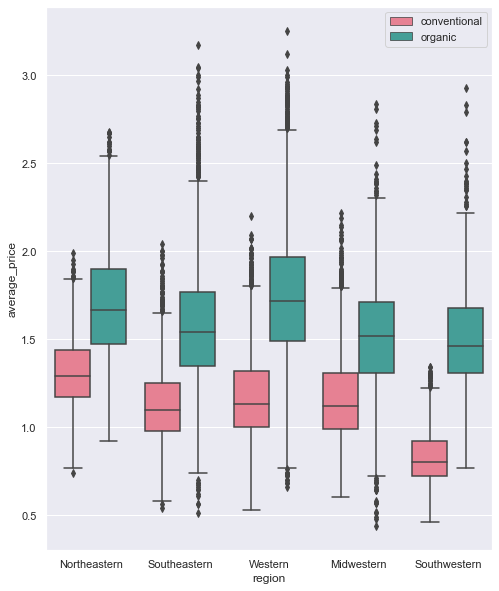

In [35]:
plt.figure(figsize=(8, 10))

sns.boxplot(y='average_price', x='region', data=df, hue='type', palette='husl')
plt.legend()
plt.show()

In [12]:
df.groupby('region')['average_price', 'total_volume'].aggregate(['mean', 'min', 'max', 'std'])

average_price                         total_volume           \
                      mean   min   max       std           mean      min   
region                                                                     
Midwestern        1.346999  0.44  2.84  0.344003  387559.627399   683.76   
Northeastern      1.503888  0.74  2.68  0.322506  239183.720822   379.82   
Southeastern      1.352133  0.51  3.17  0.356780  175759.334971    84.56   
Southwestern      1.164989  0.46  2.93  0.416004  605887.978366  4582.72   
Western           1.458257  0.53  3.25  0.438756  671995.464366   562.64   

                                         
                      max           std  
region                                   
Midwestern     7094764.73  9.009570e+05  
Northeastern   3671266.93  3.896757e+05  
Southeastern   1515888.74  2.227844e+05  
Southwestern   2381742.59  6.277512e+05  
Western       11324682.73  1.373157e+06

In [18]:
print(df[df['city'] == 'California']['region'].unique())

['Western']


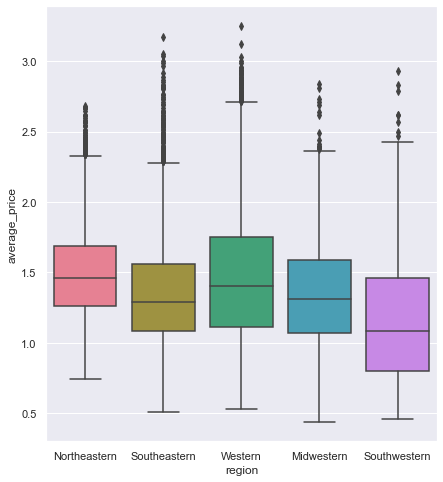

In [46]:
plt.figure(figsize=(7, 8))

sns.boxplot(y='average_price', x='region', data=df, palette='husl')
# plt.legend()
plt.show()

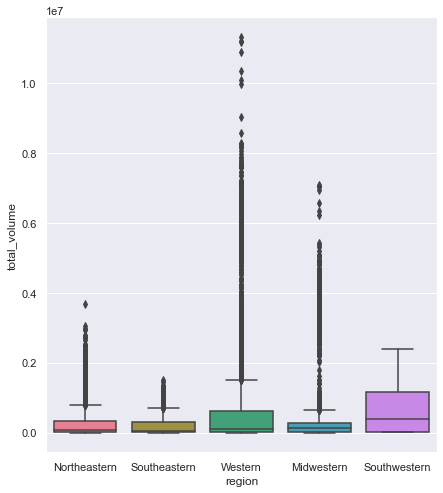

In [49]:
plt.figure(figsize=(7, 8))

sns.boxplot(y='total_volume', x='region', data=df, palette='husl')
# plt.legend()
plt.show()

In [57]:
print(df[df['city'] == 'California']['region'].unique())

['Western']


In [59]:
df[df['city'] == 'San Francisco']['average_price'].describe()

count    556.000000
mean       1.771871
std        0.506822
min        0.840000
25%        1.377500
50%        1.750000
75%        2.090000
max        3.250000
Name: average_price, dtype: float64

In [60]:
print(df[df['city'] == 'San Francisco']['region'].unique())

['Western']


In [61]:
df[df['city'] == 'Pittsburgh']['average_price'].describe()

count    556.000000
mean       1.335054
std        0.196180
min        0.740000
25%        1.220000
50%        1.340000
75%        1.470000
max        1.910000
Name: average_price, dtype: float64

In [62]:
print(df[df['city'] == 'Northern ']['region'].unique())

['Northeastern']


In [65]:
region = df.groupby(['region', 'city'])['average_price'].aggregate(['mean', 'min', 'max', 'std']).reset_index()

In [67]:
region['std'].min()

0.1961801818484247

In [70]:
region[region['std'] == region['std'].min()]

,region,city,mean,min,max,std
17,Northeastern,Pittsburgh,1.335054,0.74,1.91,0.19618


=============================================================================

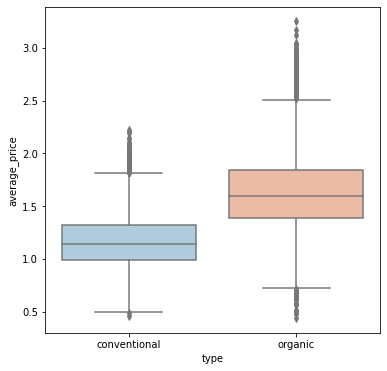

In [4]:
plt.figure(figsize=(6, 6))

sns.boxplot(x="type", y="average_price", data=df, palette='RdBu_r')
plt.show()

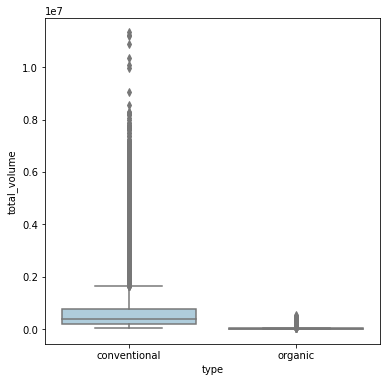

In [5]:
plt.figure(figsize=(6, 6))

sns.boxplot(x="type", y="total_volume", data=df, palette='RdBu_r')
plt.show()

=============================================================================

### ** month and seasonal factors **

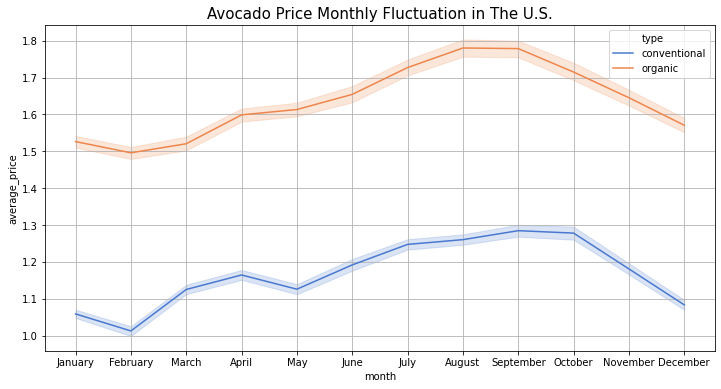

In [19]:
plt.figure(figsize=(12, 6))

sns.lineplot(x='month', y='average_price', data=df, hue='type', sort=False, palette='muted')
plt.title('Avocado Price Monthly Fluctuation in The U.S.', size=15)
plt.grid(True)
plt.legend()
plt.show()

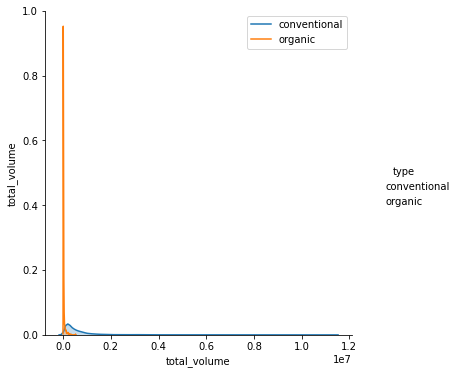

In [9]:
sns.pairplot(df, vars=['total_volume'], hue='type', size=5)
plt.legend()
plt.show()

In [10]:
df['total_volume'].describe()

count    2.668500e+04
mean     3.854724e+05
std      8.538627e+05
min      8.456000e+01
25%      1.217000e+04
50%      9.168796e+04
75%      3.912570e+05
max      1.132468e+07
Name: total_volume, dtype: float64